# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(Level 1)

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요? 
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


#### <b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

#### <b>[실습프로세스]<b>

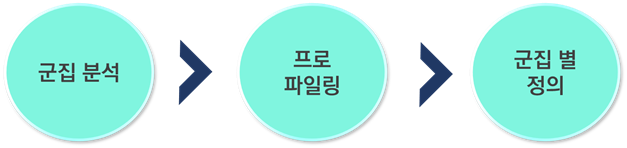

---------------------------------------------------------------------------------------------
## **(1) k-means 모델(군집 분석)**

#### **ㅇ k-means 모델이란?**
 > #### **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

### **0. 데이터 불러오기**

In [1859]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.listdir(os.getcwd())


['(미션3)보험사 마케팅활용을 위한 고객 군집화 모델링_분석 모델 개발_LV1-Copy1.ipynb',
 '(미션3)보험사 마케팅활용을 위한 고객 군집화 모델링_분석 모델 개발_LV1-답안.ipynb',
 '(미션3)보험사 마케팅활용을 위한 고객 군집화 모델링_분석 모델 개발_LV1.ipynb',
 '(미션3)보험사 마케팅활용을 위한 고객 군집화 모델링_분석 모델 개발_LV1_답안.ipynb',
 '(미션3)보험사 마케팅활용을 위한 고객 군집화 모델링_분석 모델 개발_LV2.ipynb',
 '.ipynb_checkpoints',
 '5일차 정리.pptx',
 '5일차_송주영.pptx',
 'customers_seg.csv',
 'scaler_data (1).csv',
 'scaler_data.csv']

In [1860]:
# 시각화 표에서 에러나는 부분 글꼴 셋팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

# 지수표현(소수점 2자리까지 나타내기)

pd.options.display.float_format = '{:.2f}'.format

In [1861]:
# [문제 2] 스케일링 한 데이터 불러오기
# 1. data 변수에 'scaler_data.csv' 파일을 불러와서 할당, 인코딩은 utf-8
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('scaler_data (1).csv', encoding = 'UTF -8 ')

### **1. 군집분석**

##### <b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

#### <b>**0) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

In [1862]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)

import yellowbrick

In [1863]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#### <b>**1) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [1864]:
data.head(5)

AGE  고용상태  Willingness to pay/Stay  상품타입  교육수준   소득  월 납입액  타 상품 보유 현황  \
0 0.40  0.00                     0.01  0.00  0.00 0.00   0.12        0.00   
1 0.00  1.00                     0.05  0.00  0.00 1.00   0.12        1.00   
2 0.20  0.00                     0.03  0.00  0.00 1.00   0.00        1.00   
3 0.80  1.00                     0.13  1.00  0.00 1.00   0.29        0.33   
4 0.60  1.00                     0.09  0.00  1.00 1.00   0.35        0.67   

   총지불금액  거주지사이즈  자동차  
0   0.39    0.00 0.00  
1   0.03    0.00 0.00  
2   0.22    0.00 0.00  
3   0.78    1.00 0.00  
4   0.59    0.00 0.00

In [1865]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# k 값을 1~8까지 조절해 봅시다.

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고 하고, 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model = KMeans(n_clusters= 3, random_state=2023, n_init = 10)

# 3. 정규화가 된(스케일링 된) 데이터에 학습

model.fit(data)
pred = model.predict(data)

# 4. 클러스터링 된 결과가 각 데이터가 몇 번째 그룹에 속하는지 확인 및 저장

pred

array([1, 2, 1, ..., 1, 2, 1])

In [1866]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.

centroids = model.cluster_centers_

for centroid in centroids:
    print(f"{centroid}")

[0.43365385 1.         0.08601815 0.09986888 0.13876748 1.
 0.23526841 0.1368007  0.27563678 0.09615385 0.09615385]
[3.94422133e-01 4.21884749e-15 7.06888989e-02 8.54529228e-02
 8.21062026e-02 3.24408746e-01 2.33010473e-01 4.35594229e-01
 4.21678996e-01 1.14904061e-01 9.50468541e-02]
[0.42059823 1.         0.0657809  0.07987763 0.1410605  1.
 0.21941856 0.88794471 0.26816319 0.0985724  0.08157716]


### < [같이 하기] 3가지 성능지표를 통해서 확인해보기 >

In [1867]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))
# 3. %time : 모델학습에 소요되는 시간 측정

# inertia = model.inertia_
print(f"Inertia (이너셔): {model.inertia_}")

# 2. Score 메서드를 통한 이너셔의 음수값 확인
score = model.score(data)
print(f"Score (음수 이너셔): {score}")

%time model.fit(data)

Inertia (이너셔): 8000.047484329523
Score (음수 이너셔): -8000.047484329525
CPU times: total: 172 ms
Wall time: 69.6 ms


KMeans(n_clusters=3, n_init=10, random_state=2023)

<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!
### **↓**

In [1868]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model = KMeans(n_clusters= 5, random_state=2023, n_init = 10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장

pred = model.predict(data)

#5. 학습한 결과 inertia,score,time 로 확인 해보기

# inertia = model.inertia_
print(f"Inertia (이너셔): {model.inertia_}")

# 2. Score 메서드를 통한 이너셔의 음수값 확인
score = model.score(data)
print(f"Score (음수 이너셔): {score}")

%time model.fit(data)

Inertia (이너셔): 6242.45300871473
Score (음수 이너셔): -6242.45300871473
CPU times: total: 125 ms
Wall time: 86.8 ms


KMeans(n_clusters=5, n_init=10, random_state=2023)

In [1869]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model = KMeans(n_clusters= 7, random_state=2023, n_init = 10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장

pred = model.predict(data)

#5. 학습한 결과 inertia,score,time 로 확인 해보기

# inertia = model.inertia_
print(f"Inertia (이너셔): {model.inertia_}")

# 2. Score 메서드를 통한 이너셔의 음수값 확인
score = model.score(data)
print(f"Score (음수 이너셔): {score}")

%time model.fit(data)

Inertia (이너셔): 5052.01923002428
Score (음수 이너셔): -5052.019230024279
CPU times: total: 531 ms
Wall time: 116 ms


KMeans(n_clusters=7, n_init=10, random_state=2023)

In [1870]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)



# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model = KMeans(n_clusters= 9, random_state=2023, n_init = 10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장

pred = model.predict(data)

#5. 학습한 결과 inertia,score,time 로 확인 해보기

# inertia = model.inertia_
print(f"Inertia (이너셔): {model.inertia_}")

score = model.score(data)
print(f"Score (음수 이너셔): {score}")

%time model.fit(data)

Inertia (이너셔): 4222.4229503857905
Score (음수 이너셔): -4222.4229503857905
CPU times: total: 531 ms
Wall time: 131 ms


KMeans(n_clusters=9, n_init=10, random_state=2023)

-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

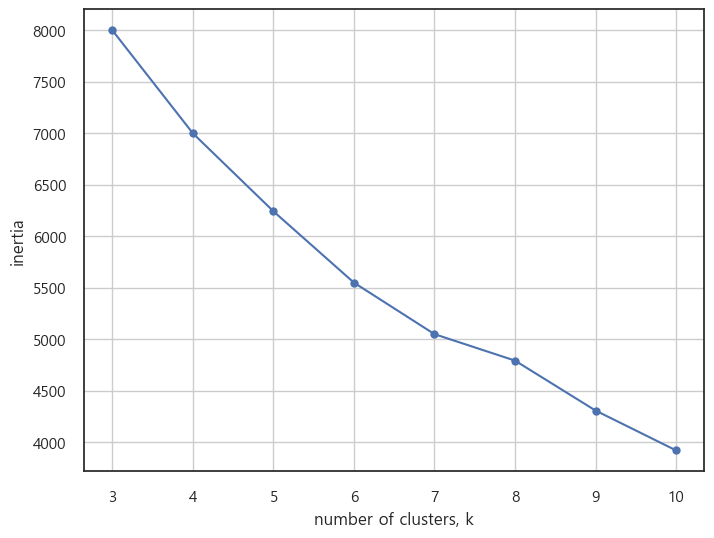

In [1871]:
kvalues = range(3, 11)
inertias = []


for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 10)
    model.fit(data)
    inertias.append(model.inertia_)
    
# Plot k vs inertias
plt.figure(figsize = (8, 6))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()


n_cluster:3, inertia:8000.047484329523
---------
n_cluster:4, inertia:6999.594798161764
---------
n_cluster:5, inertia:6242.45300871473
---------
n_cluster:6, inertia:5553.295907301489
---------
n_cluster:7, inertia:5052.019230024279
---------
n_cluster:8, inertia:4625.522650051416
---------
n_cluster:9, inertia:4222.4229503857905
---------
n_cluster:10, inertia:3918.650650451256
---------


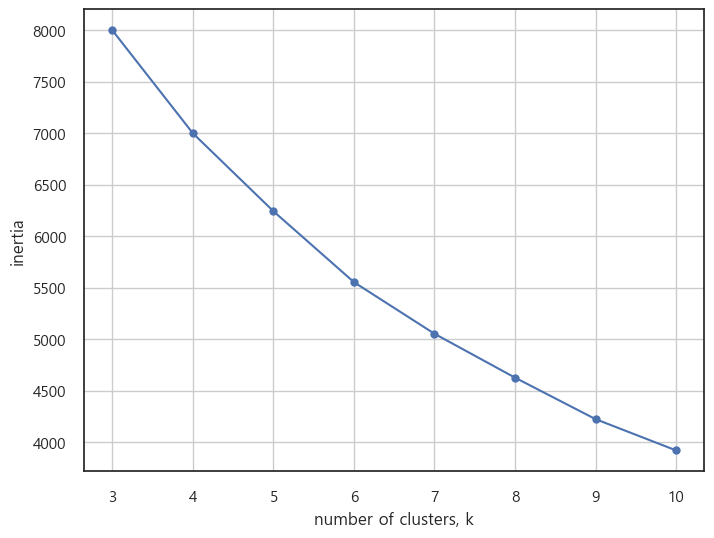

In [1872]:
#[문제 6] for 문을 활용해서 3~11까지 k값을 넣어서 성능지표 확인하기

 # k값 범위 지정(range(3,11)) 후 ks 변수에 할당
 # 이너셔 결과를 저장하기 위한 빈 리스트 생성 (변수명 inertias)

ks = range(3,11)

inertias = []

for k in ks: # for문 활용
     # k-means 모델 만들기(그룹수 : n_clusters 파라미터 사용,n_init=10)
     # 모델 학습 & 학습에 소요되는 시간 측정(%time 활용)
     # 이너셔 결과를 inertias 리스트에 계속 저장(append 활용)
    
    model = KMeans(n_clusters=k, random_state=2023, n_init = 10)
    model.fit(data)
    inertias.append(model.inertia_)
    
    print('n_cluster:{}, inertia:{}'.format(k,model.inertia_)) 
    print('---------') # n_cluster, inertia 결과 출력
    
 #plt로 결과출력

# Plot k vs inertias
plt.figure(figsize = (8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

#### <b>**2) Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

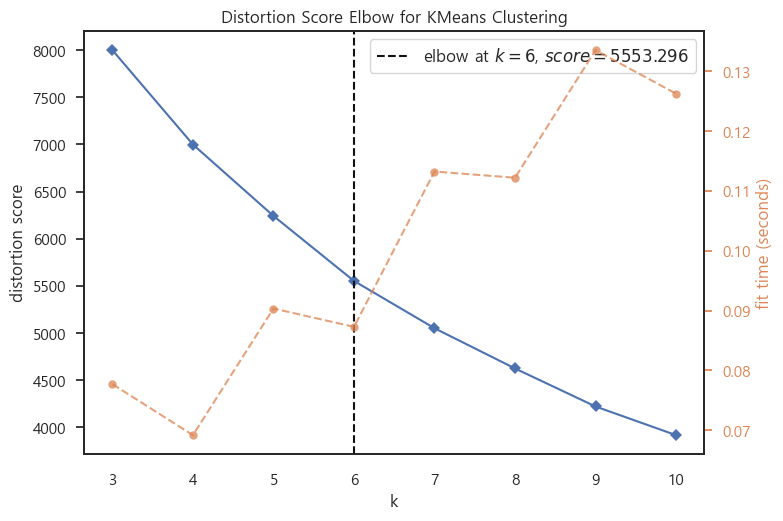

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1873]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# 1. 모델 선언하기 (random_state=2023, n_init=10 으로 설정)
model_E = KMeans(random_state=2023, n_init=10)


# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(3,11)사이의 값중에서 찾는 것으로 넣으면 된다.

Elbow_M = KElbowVisualizer(model_E, k=(3, 11))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)

# 4. Elbow 모델 확인하기(show()활용)

Elbow_M.show()

#### <b>**3) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [1874]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다(encoding='cp949')
# data_o 라는 변수에 할당하기

data_o = pd.read_csv('customers_seg.csv',encoding='cp949')

# 2. 'CID'는 활용하지 않을 예정으로 index 화 시켜봅시다.(함수: set_index 활용)
data_o = data_o.set_index('CID')

# 3. 데이터 상위 5개 확인하기
data_o.head(5)

AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준         소득  \
CID                                                                            
1      3    피보험자   무직   1                     2.62   0   기본  대학졸업          0   
2      1     계약자   고용   0                     6.35   0   기본  고졸이하  102887400   
3      2     계약자   휴직   0                     4.97   0   기본  대학졸업   22159500   
4      5     계약자   고용   1                    13.48   0   고급  고졸이하   51562500   
5      4     계약자   고용   0                     9.78   0   기본    석사   26820200   

       지역 결혼여부  월 납입액  VOC 타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널    총지불금액   자동차  \
CID                                                                         
1    도시근교   미혼     80    0          1    자주방문     없음  자사영업   631000  일반세단   
2      시골   미혼     80    1        4이상     비방문    포인트   인터넷    54000  일반세단   
3    도시근교   기혼     60    0        4이상     비방문     할인  자사영업   362000  일반세단   
4    도시근교   기혼    110    0          2     비방문     할인  자사영업  1264000  컴팩트카   
5    도시근교   기혼    120    0          3     비방문     없음   대리점   947000   SUV   

    거주지사이즈  
CID         
1        소  
2        중  
3        중  
4        대  
5        중

In [1875]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)

k4 = 6

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters= k4, n_init = 10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model_B.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(kmeans_p에 할당)

kmeans_p = model_B.predict(data)

#5. 원본 데이터 프레임에 cid(index화 시킨 열) 기준으로 clust 결과 mapping 시키기(data_d1에 할당)

data_d1 = pd.DataFrame(kmeans_p, index=data_o.index)

In [1876]:
data_d1

0
CID     
1      2
2      4
3      5
4      3
5      1
...   ..
11996  3
11997  3
11998  2
11999  4
12000  2

[12000 rows x 1 columns]

In [1877]:
data_d1.columns

RangeIndex(start=0, stop=1, step=1)

In [1878]:
# [문제 10] 데이터 프레임 clust 확인

# 1. data_d1 컬럼명을 clust로 하기
data_d1.rename(columns={0: 'clust'}, inplace=True)

# 2. data_d1 확인해보기
data_d1.head()

clust
CID       
1        2
2        4
3        5
4        3
5        1

In [1879]:
data_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

In [1880]:
print(data_d1.index)
print(data_o.index)

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999,
            12000],
           dtype='int64', name='CID', length=12000)
Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999,
            12000],
           dtype='int64', name='CID', length=12000)


In [1881]:
# [문제 11] 원 데이터(data_o) 와 클러스터링 값(data_d1) 합치기 
# 변수는 output으로 저장하고 concat 활용 해서 output 확인 해보기

output = pd.concat([data_d1,data_o ,],axis=1)
output

clust  AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
CID                                                                          
1          2    3    피보험자   무직   1                     2.62   0   기본  대학졸업   
2          4    1     계약자   고용   0                     6.35   0   기본  고졸이하   
3          5    2     계약자   휴직   0                     4.97   0   기본  대학졸업   
4          3    5     계약자   고용   1                    13.48   0   고급  고졸이하   
5          1    4     계약자   고용   0                     9.78   0   기본    석사   
...      ...  ...     ...  ...  ..                      ...  ..  ...   ...   
11996      3    1     계약자   고용   1                    25.99   0   기본  대학졸업   
11997      3    3    피보험자   고용   0                     3.44   1   중급  대학졸업   
11998      2    3    피보험자   무직   1                     9.06   0   중급  대학졸업   
11999      4    4     계약자   고용   1                     8.35   0   중급  대학졸업   
12000      2    3    피보험자   무직   1                     2.90   0   중급  대학졸업   

              소득  ... 결혼여부 월 납입액  VOC  타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널  \
CID               ...                                                    
1              0  ...   미혼    80    0           1    자주방문     없음  자사영업   
2      102887400  ...   미혼    80    1         4이상     비방문    포인트   인터넷   
3       22159500  ...   기혼    60    0         4이상     비방문     할인  자사영업   
4       51562500  ...   기혼   110    0           2     비방문     할인  자사영업   
5       26820200  ...   기혼   120    0           3     비방문     없음   대리점   
...          ...  ...  ...   ...  ...         ...     ...    ...   ...   
11996   86451000  ...   기혼    70    0           2     비방문  설계사독려   인터넷   
11997   25962000  ...   미혼    80    0           1    자주방문     할인  자사영업   
11998          0  ...   미혼    90    3           2    자주방문     할인  자사영업   
11999   26366000  ...   기혼   100    0           3     비방문    포인트  자사영업   
12000          0  ...   미혼    80    0           1    자주방문     없음   콜센터   

         총지불금액   자동차 거주지사이즈  
CID                          
1       631000  일반세단      소  
2        54000  일반세단      중  
3       362000  일반세단      중  
4      1264000  컴팩트카      대  
5       947000   SUV      중  
...        ...   ...    ...  
11996   245000  일반세단      중  
11997   468000  일반세단      중  
11998   977000  일반세단      중  
11999   854000  일반세단      대  
12000   456000  컴팩트카      중  

[12000 rows x 21 columns]

<b> 각 고객별로 군집(clust) 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

---------------------------------------------------------------------------------------------
## **(2) 프로파일링**

#### <b>ㅇ 프로파일링 이란? 
> ##### <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

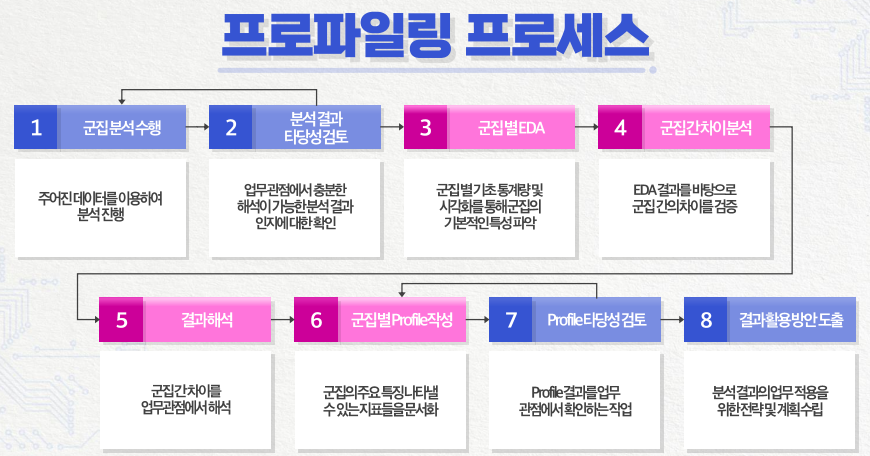

#### <font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>(범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다)
  
* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

### **0. 컬럼 확인해보기**

In [1882]:
#[문제 12] info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인(output)

output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int32  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

##### <b>clust 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

----------

### **1. AGE**

In [1883]:
output.head(5)

clust  AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
CID                                                                        
1        2    3    피보험자   무직   1                     2.62   0   기본  대학졸업   
2        4    1     계약자   고용   0                     6.35   0   기본  고졸이하   
3        5    2     계약자   휴직   0                     4.97   0   기본  대학졸업   
4        3    5     계약자   고용   1                    13.48   0   고급  고졸이하   
5        1    4     계약자   고용   0                     9.78   0   기본    석사   

            소득  ... 결혼여부 월 납입액  VOC  타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널    총지불금액  \
CID             ...                                                             
1            0  ...   미혼    80    0           1    자주방문     없음  자사영업   631000   
2    102887400  ...   미혼    80    1         4이상     비방문    포인트   인터넷    54000   
3     22159500  ...   기혼    60    0         4이상     비방문     할인  자사영업   362000   
4     51562500  ...   기혼   110    0           2     비방문     할인  자사영업  1264000   
5     26820200  ...   기혼   120    0           3     비방문     없음   대리점   947000   

      자동차 거주지사이즈  
CID               
1    일반세단      소  
2    일반세단      중  
3    일반세단      중  
4    컴팩트카      대  
5     SUV      중  

[5 rows x 21 columns]

In [1884]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

pro_df = pd.crosstab([output['clust']], output['AGE'],margins=True)

# 비율로도 한번 확인 해보자.
# round 사용해서 각 값들이 전체 대비 얼마만큼 있는지 비율 확인 가능하다.
# round ((df[]/df['All'])* 100, 2) 활용 해서 df['_비울'] 으로 할당하기

pro_df['1(20대)_비율'] = np.round((pro_df[1]/pro_df['All'])*100,2)
pro_df['2(30대)_비율'] = np.round((pro_df[2]/pro_df['All'])*100,2)
pro_df['3(40대)_비율'] = np.round((pro_df[3]/pro_df['All'])*100,2)
pro_df['4(50대)_비율'] = np.round((pro_df[4]/pro_df['All'])*100,2)
pro_df['5(60대)_비율'] = np.round((pro_df[5]/pro_df['All'])*100,2)
pro_df['6(70대)_비율'] = np.round((pro_df[6]/pro_df['All'])*100,2)

# pro_df 값 확인

pro_df

AGE       1     2     3     4     5   6    All  1(20대)_비율  2(30대)_비율  \
clust                                                                  
0        74    83   122   293   205  29    806       9.18      10.30   
1       196   105   240   333    84   1    959      20.44      10.95   
2         0   508  2520     0     0   0   3028       0.00      16.78   
3       709   416   673  1278   450  18   3544      20.01      11.74   
4       475   297   464   784   318   4   2342      20.28      12.68   
5         0   129   756   436     0   0   1321       0.00       9.77   
All    1454  1538  4775  3124  1057  52  12000      12.12      12.82   

AGE    3(40대)_비율  4(50대)_비율  5(60대)_비율  6(70대)_비율  
clust                                              
0          15.14      36.35      25.43       3.60  
1          25.03      34.72       8.76       0.10  
2          83.22       0.00       0.00       0.00  
3          18.99      36.06      12.70       0.51  
4          19.81      33.48      13.58       0.17  
5          57.23      33.01       0.00       0.00  
All        39.79      26.03       8.81       0.43

<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1885]:
#[같이 하기]
# 50대는 clust 5에 가장 많이 분포한다.
# 20대는 clust 3에 가장 많이 분포한다.
# 30대는 clust 2에 가장 많이 분포한다.

### **2. 등록(계/피)**

In [1886]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_regist = pd.crosstab([output['clust']], output['등록(계/피)'],margins=True)


# 각 클러스터의 '계약자','피보험자'의 비율을 한번 체크해보자
pro_regist['계약자 비율'] = np.round((pro_regist['계약자']/pro_regist['All'])*100,2)
pro_regist['피보험자 비율'] = np.round((pro_regist['피보험자']/pro_regist['All'])*100,2)

# pro_df 확인
pro_regist

등록(계/피)   계약자  피보험자    All  계약자 비율  피보험자 비율
clust                                      
0         631   175    806   78.29    21.71
1         780   179    959   81.33    18.67
2        2379   649   3028   78.57    21.43
3        2797   747   3544   78.92    21.08
4        1788   554   2342   76.35    23.65
5        1050   271   1321   79.49    20.51
All      9425  2575  12000   78.54    21.46

<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1887]:
# [문제 14]
# 그룹별로 계약자의 비율이 전반적으로 높다.
# clust 사이의 비율이 크게 차이나지 않아 보인다.

### **3. 성별**

In [1888]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_gender = pd.crosstab([output['clust']], output['성별'],margins=True)
display(pro_gender)

# 각 클러스터의 '0','1' 의 비율을 한번 체크해보자
# feature 의미 : 0(여성),1(남성)

pro_gender['여성 비율'] = np.round((pro_gender[1]/pro_gender['All'])*100,2)
pro_gender['남성 비율'] = np.round((pro_gender[0]/pro_gender['All'])*100,2)


# pro_df 확인

pro_gender

성별        0     1    All
clust                   
0       389   417    806
1       496   463    959
2      1485  1543   3028
3      1867  1677   3544
4      1208  1134   2342
5       704   617   1321
All    6149  5851  12000

성별        0     1    All  여성 비율  남성 비율
clust                                 
0       389   417    806  51.74  48.26
1       496   463    959  48.28  51.72
2      1485  1543   3028  50.96  49.04
3      1867  1677   3544  47.32  52.68
4      1208  1134   2342  48.42  51.58
5       704   617   1321  46.71  53.29
All    6149  5851  12000  48.76  51.24

<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1889]:
# [문제 16]
# clust 별로 남성, 여성 비율의 대소가 다르다.

### **4. willingness to pay/stay(수치)**

In [1890]:
output[['clust','Willingness to pay/Stay']]

clust  Willingness to pay/Stay
CID                                  
1          2                     2.62
2          4                     6.35
3          5                     4.97
4          3                    13.48
5          1                     9.78
...      ...                      ...
11996      3                    25.99
11997      3                     3.44
11998      2                     9.06
11999      4                     8.35
12000      2                     2.90

[12000 rows x 2 columns]

In [1891]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','Willingness to pay/Stay']].groupby(['clust']).agg(['max','min','mean','median'])

Willingness to pay/Stay                  
                          max  min  mean median
clust                                          
0                       92.50 4.08 15.42  11.07
1                       56.63 2.57  8.33   6.01
2                       82.40 2.05  8.37   6.11
3                       65.21 2.47  9.11   5.00
4                       17.53 4.80  7.52   6.72
5                       48.05 2.34  8.07   5.79

<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1892]:
# [같이 하기] 
# 4. willingness to pay/stay(수치)
# clust 3 max, mean, median 값 또한 가장 높다.
# clust 2 min 값은 가장 높으나 나머지 값들이 낮다.

### **5. 상품 타입**

In [1893]:
output[['clust','상품타입']]

clust 상품타입
CID              
1          2   기본
2          4   기본
3          5   기본
4          3   고급
5          1   기본
...      ...  ...
11996      3   기본
11997      3   중급
11998      2   중급
11999      4   중급
12000      2   중급

[12000 rows x 2 columns]

In [1894]:
pd.crosstab([output['clust']], output['상품타입'],margins=True)

상품타입     고급    기본    중급    All
clust                         
0       100   453   253    806
1        69   587   303    959
2       262  1802   964   3028
3       335  2155  1054   3544
4       202  1451   689   2342
5       107   830   384   1321
All    1075  7278  3647  12000

In [1895]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['상품타입'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_pro['고급 비율'] = np.round((pro_pro['고급']/pro_pro['All'])*100,2)
pro_pro['기본 비율'] = np.round((pro_pro['기본']/pro_pro['All'])*100,2)
pro_pro['중급 비율'] = np.round((pro_pro['중급']/pro_pro['All'])*100,2)
# pro_df 확인
pro_pro

상품타입     고급    기본    중급    All  고급 비율  기본 비율  중급 비율
clust                                              
0       100   453   253    806  12.41  56.20  31.39
1        69   587   303    959   7.19  61.21  31.60
2       262  1802   964   3028   8.65  59.51  31.84
3       335  2155  1054   3544   9.45  60.81  29.74
4       202  1451   689   2342   8.63  61.96  29.42
5       107   830   384   1321   8.10  62.83  29.07
All    1075  7278  3647  12000   8.96  60.65  30.39

<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1896]:
# [문제 18]
# 전반적으로 기본 비율이 높다.
# clust 3 유일하게 고급 비율이 두 자릿수이다.

### **6. 교육수준**

In [1897]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['교육수준'],margins=True)
display(pro_pro)

# 각 클러스터의 범주별 비율을 한번 체크해보자
# 앞의 탐색적 데이터 분석에서 두가지 범주로 구분을 해도 좋을 것 같다고 판단했다.
# 대졸이하(고졸이하 + 대학졸업) / 석사이상(석사+박사)으로 이분하여 비율을 한번 체크해보자


# pro_df 확인
pro_pro['대졸이하 비율'] = np.round(( (pro_pro['고졸이하'] + pro_pro['대학졸업'] ) /pro_pro['All'])*100,2)

pro_pro['석사이상 비율'] = np.round(( ( pro_pro['석사'] + pro_pro['박사'] ) /pro_pro['All'])*100,2)
# pro_df 확인
pro_pro

교육수준   고졸이하  대학졸업   박사   석사    All
clust                             
0       238   467   29   72    806
1         0     0  295  664    959
2      1030  1805   67  126   3028
3      1065  2479    0    0   3544
4       778  1564    0    0   2342
5       366   790   48  117   1321
All    3477  7105  439  979  12000

교육수준   고졸이하  대학졸업   박사   석사    All  대졸이하 비율  석사이상 비율
clust                                               
0       238   467   29   72    806    87.47    12.53
1         0     0  295  664    959     0.00   100.00
2      1030  1805   67  126   3028    93.63     6.37
3      1065  2479    0    0   3544   100.00     0.00
4       778  1564    0    0   2342   100.00     0.00
5       366   790   48  117   1321    87.51    12.49
All    3477  7105  439  979  12000    88.18    11.82

<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1898]:
#[문제 20]
# 대졸이하 비율이 높다.
# crosstab에서 또한 대학졸업 인원이 가장 많음을 알 수 있다.

### **7. 고용상태**

In [1899]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_pro = pd.crosstab([output['clust']], output['고용상태'],margins=True)
display(pro_pro)


# 각 클러스터의 범주별 비율을 한번 체크해보자
# false,고용, 무직, 휴직 별로 확인해보자. 

pro_pro['FALSE 비율'] = np.round(( pro_pro['FALSE']  /pro_pro['All'])*100,2)

pro_pro['고용 비율'] = np.round(( pro_pro['고용']  /pro_pro['All'])*100,2)

pro_pro['무직 비율'] = np.round((  pro_pro['무직']  /pro_pro['All'])*100,2)

pro_pro['휴직 비율'] = np.round(( pro_pro['휴직']  /pro_pro['All'])*100,2)
# pro_df 확인
pro_pro

고용상태   FALSE    고용    무직    휴직    All
clust                                
0         34   673     0    99    806
1          0   959     0     0    959
2          0     0  3028     0   3028
3          0  3544     0     0   3544
4          0  2342     0     0   2342
5        326     0     0   995   1321
All      360  7518  3028  1094  12000

고용상태   FALSE    고용    무직    휴직    All  FALSE 비율  고용 비율  무직 비율  휴직 비율
clust                                                               
0         34   673     0    99    806      4.22  83.50   0.00  12.28
1          0   959     0     0    959      0.00 100.00   0.00   0.00
2          0     0  3028     0   3028      0.00   0.00 100.00   0.00
3          0  3544     0     0   3544      0.00 100.00   0.00   0.00
4          0  2342     0     0   2342      0.00 100.00   0.00   0.00
5        326     0     0   995   1321     24.68   0.00   0.00  75.32
All      360  7518  3028  1094  12000      3.00  62.65  25.23   9.12

<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [1900]:
# [문제 22] false(미확인값)을 제외하고 해석해보자

# clust4서 유난히 휴직 비율이 높다.
# 전반적으로 고용비율이 높다.

### **8. 소득(수치)**

In [1901]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','소득']].groupby(['clust']).agg(['max','min','mean','median'])

소득                                  
             max       min        mean      median
clust                                             
0      132020900  14193000 60143779.16 56616950.00
1      131727200  24274000 69735442.13 69493600.00
2              0         0        0.00        0.00
3      131976900  24045000 69390455.64 68377500.00
4      131871300  24089000 69514415.03 68473000.00
5       39601100  12061000 24930925.36 25323000.00

In [285]:
output[['clust','소득']]

clust         소득
CID                    
1          2          0
2          5  102887400
3          3   22159500
4          1   51562500
5          4   26820200
...      ...        ...
11996      1   86451000
11997      1   25962000
11998      2          0
11999      5   26366000
12000      2          0

[12000 rows x 2 columns]

<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [286]:
# [문제 24]
# clust1은 모두 0 값이 나온다.
# clust4는 유난히 max 값이 낮다.

### **9. 결혼여부**

In [287]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_pro = pd.crosstab([output['clust']], output['결혼여부'],margins=True)
display(pro_pro)

# 각 클러스터의 범주별 비율을 한번 체크해보자

# pro_df 확인
pro_pro['기혼 비율'] = np.round(( (pro_pro['기혼'] ) /pro_pro['All'])*100,2)

pro_pro['미혼 비율'] = np.round(( ( pro_pro['미혼']) /pro_pro['All'])*100,2)
# pro_df 확인
pro_pro


# pro_df 확인


결혼여부     기혼    미혼    All
clust                   
0       529   261    790
1      2375  1169   3544
2      1012  2016   3028
3       667   489   1156
4       733   407   1140
5      1641   701   2342
All    6957  5043  12000

결혼여부     기혼    미혼    All  기혼 비율  미혼 비율
clust                                 
0       529   261    790  66.96  33.04
1      2375  1169   3544  67.01  32.99
2      1012  2016   3028  33.42  66.58
3       667   489   1156  57.70  42.30
4       733   407   1140  64.30  35.70
5      1641   701   2342  70.07  29.93
All    6957  5043  12000  57.98  42.02

<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [288]:
#[문제 26]
# 전반적으로 기혼 비율이 높다.
# clust1에서만 기혼 비율이 낮다.

### **10. 월 납입액(수치)**

In [289]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','월 납입액']].groupby(['clust']).agg(['max','min','mean','median'])

월 납입액                   
        max  min   mean median
clust                         
0       350  100 184.75 160.00
1       230   60  91.52  80.00
2       350   60 101.17  90.00
3       230   60  91.48  80.00
4       230   60  91.36  80.00
5       230   60  91.48  80.00

<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [290]:
#[문제 28]
# clust1에서 유난히 median 값이 높다.
# clust3을 제외하면 다른 clust에서 min 값은 모두 60이다.

### **11. VOC**

In [291]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_pro = pd.crosstab([output['clust']], output['VOC'],margins=True)
display(pro_pro)


# 각 클러스터의 범주별 비율을 한번 체크해보자
# 우리는 VOC를 가지고 몇개가 많음을 판단하는 기준이 없다. 해서 VOC(불만 접수 사례 수)를 0과 1로 이분화 해보자.
# 0개 / 1개 이상 으로 이분하여 비율을 한번 체크해보자
# 1개 이상은 전체에서 0개 건수를 빼면 나올 것 같다!


# pro_df 확인
pro_pro['0개 비율'] = np.round( (pro_pro[0] / pro_pro['All'] )*100,2)

pro_pro['1개 이상 비율'] = np.round( (pro_pro[1] + pro_pro[2] + pro_pro[3] + pro_pro[4] + pro_pro[5]) /pro_pro['All'] *100,2)
# pro_df 확인
pro_pro


VOC       0     1    2    3    4   5    All
clust                                      
0       634    88   39   23    6   0    790
1      2794   399  143  116   62  30   3544
2      2400   319  139  106   45  19   3028
3       928   127   43   28   19  11   1156
4       907   129   37   38   26   3   1140
5      1852   251   94   94   38  13   2342
All    9515  1313  495  405  196  76  12000

VOC       0     1    2    3    4   5    All  0개 비율  1개 이상 비율
clust                                                       
0       634    88   39   23    6   0    790  80.25     19.75
1      2794   399  143  116   62  30   3544  78.84     21.16
2      2400   319  139  106   45  19   3028  79.26     20.74
3       928   127   43   28   19  11   1156  80.28     19.72
4       907   129   37   38   26   3   1140  79.56     20.44
5      1852   251   94   94   38  13   2342  79.08     20.92
All    9515  1313  495  405  196  76  12000  79.29     20.71

<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [292]:
#[문제 30]
# 모든 clust에서 0개 비율이 높다.
# clust3, 4에서는 0개 비율이 80%를 넘는다.

### **12. 타 상품 보유 현황**

In [293]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_pro = pd.crosstab([output['clust']], output['타 상품 보유 현황'],margins=True)
display(pro_pro)

# 각 클러스터의 범주별 비율을 한번 체크해보자

# pro_df 확인
pro_pro['1개_비율'] = np.round(( (pro_pro['1'] ) /  pro_pro['All'] ) *100,2)

pro_pro['2개_비율'] = np.round(( ( pro_pro['2']) /  pro_pro['All']  )*100,2)

pro_pro['3개_비율'] = np.round(( ( pro_pro['3']) /  pro_pro['All']  )*100,2)

pro_pro['4개_이상_비율'] = np.round(( ( pro_pro['4이상']) /  pro_pro['All']  )*100,2)

# pro_df 확인
pro_pro


타 상품 보유 현황     1     2     3   4이상    All
clust                                    
0            317   212    70   191    790
1           2054  1490     0     0   3544
2           1053   759   364   852   3028
3            421   298   154   283   1156
4            438   258   159   285   1140
5              0     0   798  1544   2342
All         4283  3017  1545  3155  12000

타 상품 보유 현황     1     2     3   4이상    All  1개_비율  2개_비율  3개_비율  4개_이상_비율
clust                                                                   
0            317   212    70   191    790  40.13  26.84   8.86     24.18
1           2054  1490     0     0   3544  57.96  42.04   0.00      0.00
2           1053   759   364   852   3028  34.78  25.07  12.02     28.14
3            421   298   154   283   1156  36.42  25.78  13.32     24.48
4            438   258   159   285   1140  38.42  22.63  13.95     25.00
5              0     0   798  1544   2342   0.00   0.00  34.07     65.93
All         4283  3017  1545  3155  12000  35.69  25.14  12.88     26.29

<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [294]:
#[문제 32]
# clust2 : 4개 이상 비율이 유난히 높다.
# 
# 

### **13. 갱신 인센티브**

In [295]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['갱신인센티브'],margins=True)
display(pro_pro)


# 각 클러스터의 범주별 비율을 한번 체크해보자

# pro_df 확인
pro_pro['설계사독려 비율'] = np.round(( (pro_pro['설계사독려'] ) /  pro_pro['All'] ) *100,2)

pro_pro['없음 비율'] = np.round(( (pro_pro['없음'] ) /  pro_pro['All'] ) *100,2)

pro_pro['포인트 비율'] = np.round(( ( pro_pro['포인트']) /  pro_pro['All']  )*100,2)

pro_pro['할인 비율'] = np.round(( ( pro_pro['할인']) /  pro_pro['All']  )*100,2)
# pro_df 확인
pro_pro


갱신인센티브  설계사독려    없음   포인트    할인    All
clust                                 
0         250    91   126   323    790
1        1396   509   559  1080   3544
2         702   248   462  1616   3028
3         299    80   131   646   1156
4         410   147   206   377   1140
5         808   263   407   864   2342
All      3865  1338  1891  4906  12000

갱신인센티브  설계사독려    없음   포인트    할인    All  설계사독려 비율  없음 비율  포인트 비율  할인 비율
clust                                                                 
0         250    91   126   323    790     31.65  11.52   15.95  40.89
1        1396   509   559  1080   3544     39.39  14.36   15.77  30.47
2         702   248   462  1616   3028     23.18   8.19   15.26  53.37
3         299    80   131   646   1156     25.87   6.92   11.33  55.88
4         410   147   206   377   1140     35.96  12.89   18.07  33.07
5         808   263   407   864   2342     34.50  11.23   17.38  36.89
All      3865  1338  1891  4906  12000     32.21  11.15   15.76  40.88

<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [296]:
#[문제 34]
# 
# 

### **14. 총 지불 금액(수치)**

In [297]:
# [문제 35] '총지불금액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','총지불금액']].groupby(['clust']).agg(['max','min','mean','median'])

총지불금액                           
           max    min      mean    median
clust                                    
0      3573000      0 860141.77 765000.00
1      1765000   1000 414592.83 399500.00
2      3408000   3000 739828.60 646000.00
3      1560000  10000 562217.99 522000.00
4      1558000   1000 371004.39 373000.00
5      1735000      0 412094.79 400000.00

<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [298]:
#[문제 36]
# 
# 

### **15. 자동차**

In [299]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['자동차'],margins=True)
display(pro_pro)


# 각 클러스터의 범주별 비율을 한번 체크해보자

# pro_df 확인
pro_pro['SUV 비율'] = np.round(( (pro_pro['SUV'] ) /  pro_pro['All'] ) *100,2)
pro_pro['고급차 비율'] = np.round(( (pro_pro['고급차'] ) /  pro_pro['All'] ) *100,2)
pro_pro['스포츠카 비율'] = np.round(( (pro_pro['스포츠카'] ) /  pro_pro['All'] ) *100,2)
pro_pro['일반세단 비율'] = np.round(( (pro_pro['일반세단'] ) /  pro_pro['All'] ) *100,2)
pro_pro['컴팩트카 비율'] = np.round(( (pro_pro['컴팩트카'] ) /  pro_pro['All'] ) *100,2)

# pro_df 확인
pro_pro

자동차     SUV  고급차  스포츠카  일반세단  컴팩트카    All
clust                                    
0         0  339   451     0     0    790
1       731    0     0  1947   866   3544
2       637  115   178  1503   595   3028
3       262    0     0   642   252   1156
4       217    0    23   623   277   1140
5       489    0     0  1359   494   2342
All    2336  454   652  6074  2484  12000

자동차     SUV  고급차  스포츠카  일반세단  컴팩트카    All  SUV 비율  고급차 비율  스포츠카 비율  일반세단 비율  \
clust                                                                         
0         0  339   451     0     0    790    0.00   42.91    57.09     0.00   
1       731    0     0  1947   866   3544   20.63    0.00     0.00    54.94   
2       637  115   178  1503   595   3028   21.04    3.80     5.88    49.64   
3       262    0     0   642   252   1156   22.66    0.00     0.00    55.54   
4       217    0    23   623   277   1140   19.04    0.00     2.02    54.65   
5       489    0     0  1359   494   2342   20.88    0.00     0.00    58.03   
All    2336  454   652  6074  2484  12000   19.47    3.78     5.43    50.62   

자동차    컴팩트카 비율  
clust           
0         0.00  
1        24.44  
2        19.65  
3        21.80  
4        24.30  
5        21.09  
All      20.70

<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [300]:
#[문제 38]
# 
# 

 ### **16. 거주지 사이즈**

In [301]:
# [문제 39] '거주지 사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['거주지사이즈'],margins=True)
display(pro_pro)

# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_pro['대_비율'] = np.round(( (pro_pro['대'] ) /  pro_pro['All'] ) *100,2)
pro_pro['소_비율'] = np.round(( (pro_pro['소'] ) /  pro_pro['All'] ) *100,2)
pro_pro['중_비율'] = np.round(( (pro_pro['중'] ) /  pro_pro['All'] ) *100,2)

# pro_df 확인
pro_pro

거주지사이즈     대     소     중    All
clust                          
0         84   146   560    790
1        322   658  2564   3544
2        342   595  2091   3028
3        140   232   784   1156
4        128   231   781   1140
5        229   470  1643   2342
All     1245  2332  8423  12000

거주지사이즈     대     소     중    All  대_비율  소_비율  중_비율
clust                                            
0         84   146   560    790 10.63 18.48 70.89
1        322   658  2564   3544  9.09 18.57 72.35
2        342   595  2091   3028 11.29 19.65 69.06
3        140   232   784   1156 12.11 20.07 67.82
4        128   231   781   1140 11.23 20.26 68.51
5        229   470  1643   2342  9.78 20.07 70.15
All     1245  2332  8423  12000 10.38 19.43 70.19

<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [302]:
#[문제 40]
# 
# 

### **17. 갱신**

In [303]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['갱신'],margins=True)
display(pro_pro)


# 각 클러스터의 범주별 비율을 한번 체크해보자
# 비갱신(0),갱신(1) 으로 나눠서 비율을 확인해보면 된다.

# pro_df 확인
pro_pro['비갱신 비율'] = np.round(( (pro_pro[0] ) /  pro_pro['All'] ) *100,2)

pro_pro['갱신 비율'] = np.round(( ( pro_pro[1]) /  pro_pro['All']  )*100,2)
# pro_df 확인
pro_pro


# pro_df 확인


갱신         0     1    All
clust                    
0        651   139    790
1       3062   482   3544
2       2753   275   3028
3        795   361   1156
4        950   190   1140
5       2073   269   2342
All    10284  1716  12000

갱신         0     1    All  비갱신 비율  갱신 비율
clust                                   
0        651   139    790   82.41  17.59
1       3062   482   3544   86.40  13.60
2       2753   275   3028   90.92   9.08
3        795   361   1156   68.77  31.23
4        950   190   1140   83.33  16.67
5       2073   269   2342   88.51  11.49
All    10284  1716  12000   85.70  14.30

<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [304]:
#[문제 42]
# 
# 

### **18. 지역**

In [305]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['지역'],margins=True)
display(pro_pro)


# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_pro['도시근교 비율'] = np.round(( (pro_pro['도시근교'] ) /  pro_pro['All'] ) *100,2)

pro_pro['도심 비율'] = np.round(( ( pro_pro['도심']) /  pro_pro['All']  )*100,2)

pro_pro['시골 비율'] = np.round(( ( pro_pro['시골']) /  pro_pro['All']  )*100,2)

# pro_df 확인
pro_pro


지역     도시근교    도심    시골    All
clust                         
0       486   139   165    790
1      1716   877   951   3544
2      2768   118   142   3028
3      1041    61    54   1156
4       436   293   411   1140
5      1125   596   621   2342
All    7572  2084  2344  12000

지역     도시근교    도심    시골    All  도시근교 비율  도심 비율  시골 비율
clust                                                
0       486   139   165    790    61.52  17.59  20.89
1      1716   877   951   3544    48.42  24.75  26.83
2      2768   118   142   3028    91.41   3.90   4.69
3      1041    61    54   1156    90.05   5.28   4.67
4       436   293   411   1140    38.25  25.70  36.05
5      1125   596   621   2342    48.04  25.45  26.52
All    7572  2084  2344  12000    63.10  17.37  19.53

<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [306]:
#[문제 44]
# 
# 

### **19. 온라인방문빈도**

In [307]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['온라인방문빈도'],margins=True)
display(pro_pro)

# 각 클러스터의 범주별 비율을 한번 체크해보자

# pro_df 확인
pro_pro['비방문 비율'] = np.round(( (pro_pro['비방문'] ) /  pro_pro['All'] ) *100,2)

pro_pro['자주방문 비율'] = np.round(( ( pro_pro['자주방문']) /  pro_pro['All']  )*100,2)

pro_pro['종종 비율'] = np.round(( ( pro_pro['종종']) /  pro_pro['All']  )*100,2)

# pro_df 확인
pro_pro

온라인방문빈도   비방문  자주방문   종종    All
clust                          
0         585   172   33    790
1        2649   747  148   3544
2        2255   649  124   3028
3         859   245   52   1156
4         886   208   46   1140
5        1694   554   94   2342
All      8928  2575  497  12000

온라인방문빈도   비방문  자주방문   종종    All  비방문 비율  자주방문 비율  종종 비율
clust                                                  
0         585   172   33    790   74.05    21.77   4.18
1        2649   747  148   3544   74.75    21.08   4.18
2        2255   649  124   3028   74.47    21.43   4.10
3         859   245   52   1156   74.31    21.19   4.50
4         886   208   46   1140   77.72    18.25   4.04
5        1694   554   94   2342   72.33    23.65   4.01
All      8928  2575  497  12000   74.40    21.46   4.14

<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [308]:
#[문제 46]
# 
# 

### **20. 판매채널**

In [309]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_pro = pd.crosstab([output['clust']], output['판매채널'],margins=True)
display(pro_pro)

# 각 클러스터의 범주별 비율을 한번 체크해보자

# pro_df 확인
pro_pro['대리점 비율'] = np.round(( (pro_pro['대리점'] ) /  pro_pro['All'] ) *100,2)

pro_pro['인터넷 비율'] = np.round(( ( pro_pro['인터넷']) /  pro_pro['All']  )*100,2)

pro_pro['자사영업 비율'] = np.round(( ( pro_pro['자사영업']) /  pro_pro['All']  )*100,2)

pro_pro['콜센터 비율'] = np.round(( ( pro_pro['콜센터']) /  pro_pro['All']  )*100,2)


# pro_df 확인
pro_pro



판매채널    대리점   인터넷  자사영업   콜센터    All
clust                               
0       323   120   218   129    790
1      1361   515  1001   667   3544
2      1191   426   835   576   3028
3       447   188   311   210   1156
4       424   156   333   227   1140
5       846   335   651   510   2342
All    4592  1740  3349  2319  12000

판매채널    대리점   인터넷  자사영업   콜센터    All  대리점 비율  인터넷 비율  자사영업 비율  콜센터 비율
clust                                                                
0       323   120   218   129    790   40.89   15.19    27.59   16.33
1      1361   515  1001   667   3544   38.40   14.53    28.24   18.82
2      1191   426   835   576   3028   39.33   14.07    27.58   19.02
3       447   188   311   210   1156   38.67   16.26    26.90   18.17
4       424   156   333   227   1140   37.19   13.68    29.21   19.91
5       846   335   651   510   2342   36.12   14.30    27.80   21.78
All    4592  1740  3349  2319  12000   38.27   14.50    27.91   19.32

<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [310]:
#[문제 48]
# 
# 

---------------------------------------------------------------------------------------------
## **(3) 결과 정리**

### <font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

### <b>[군집별 특성/정의 및 방안]

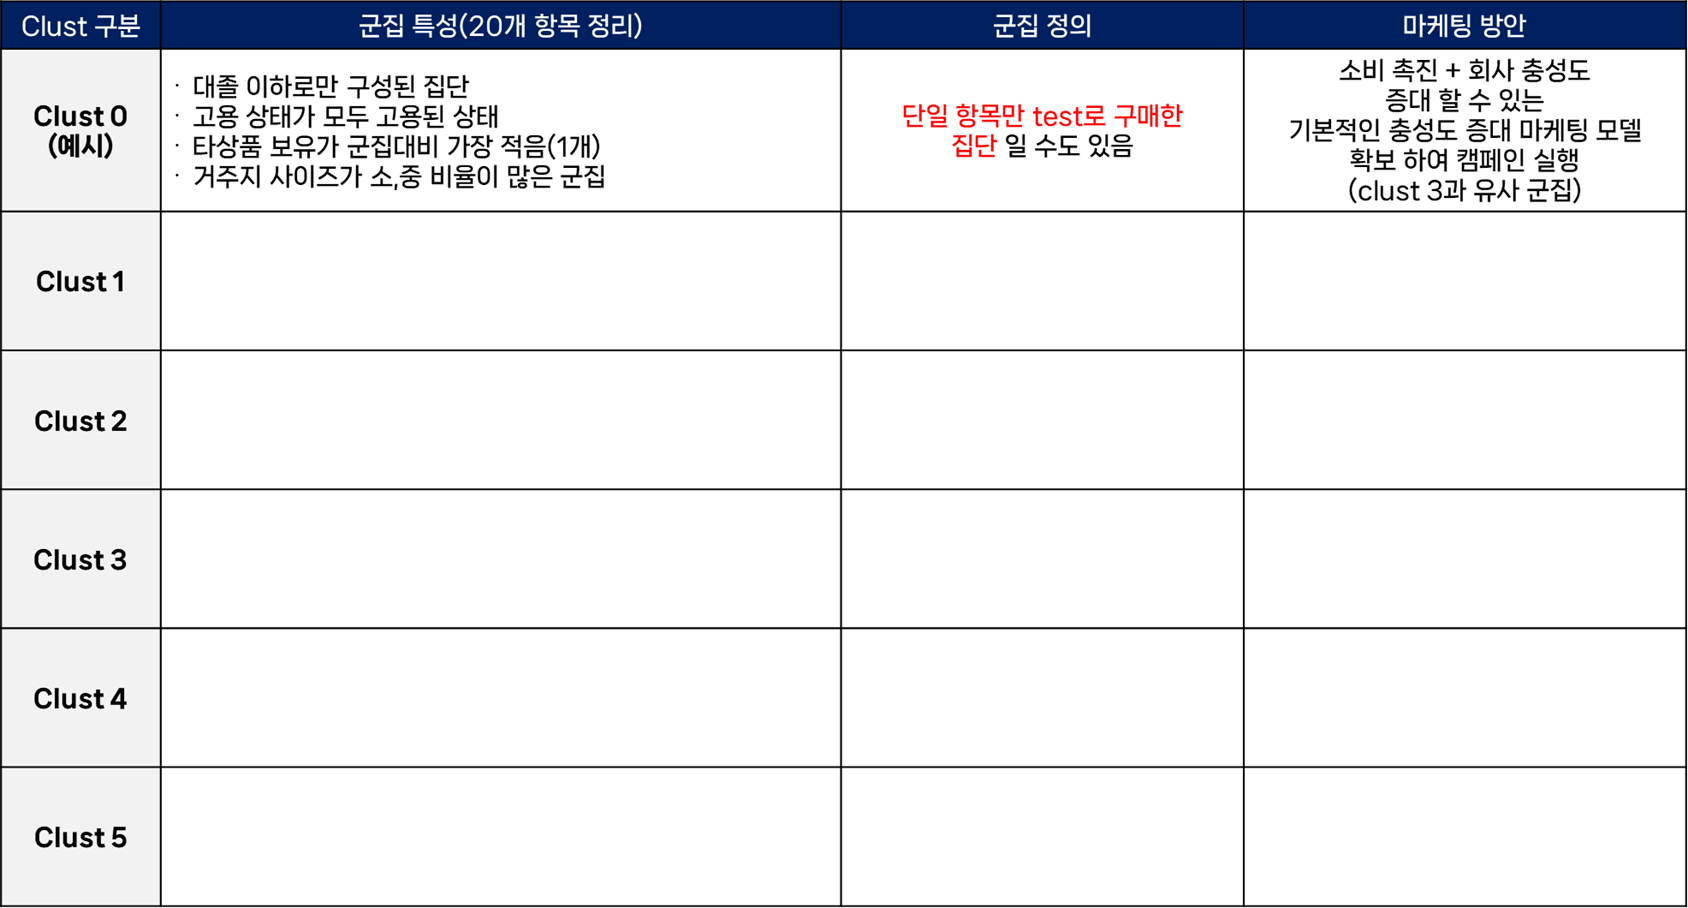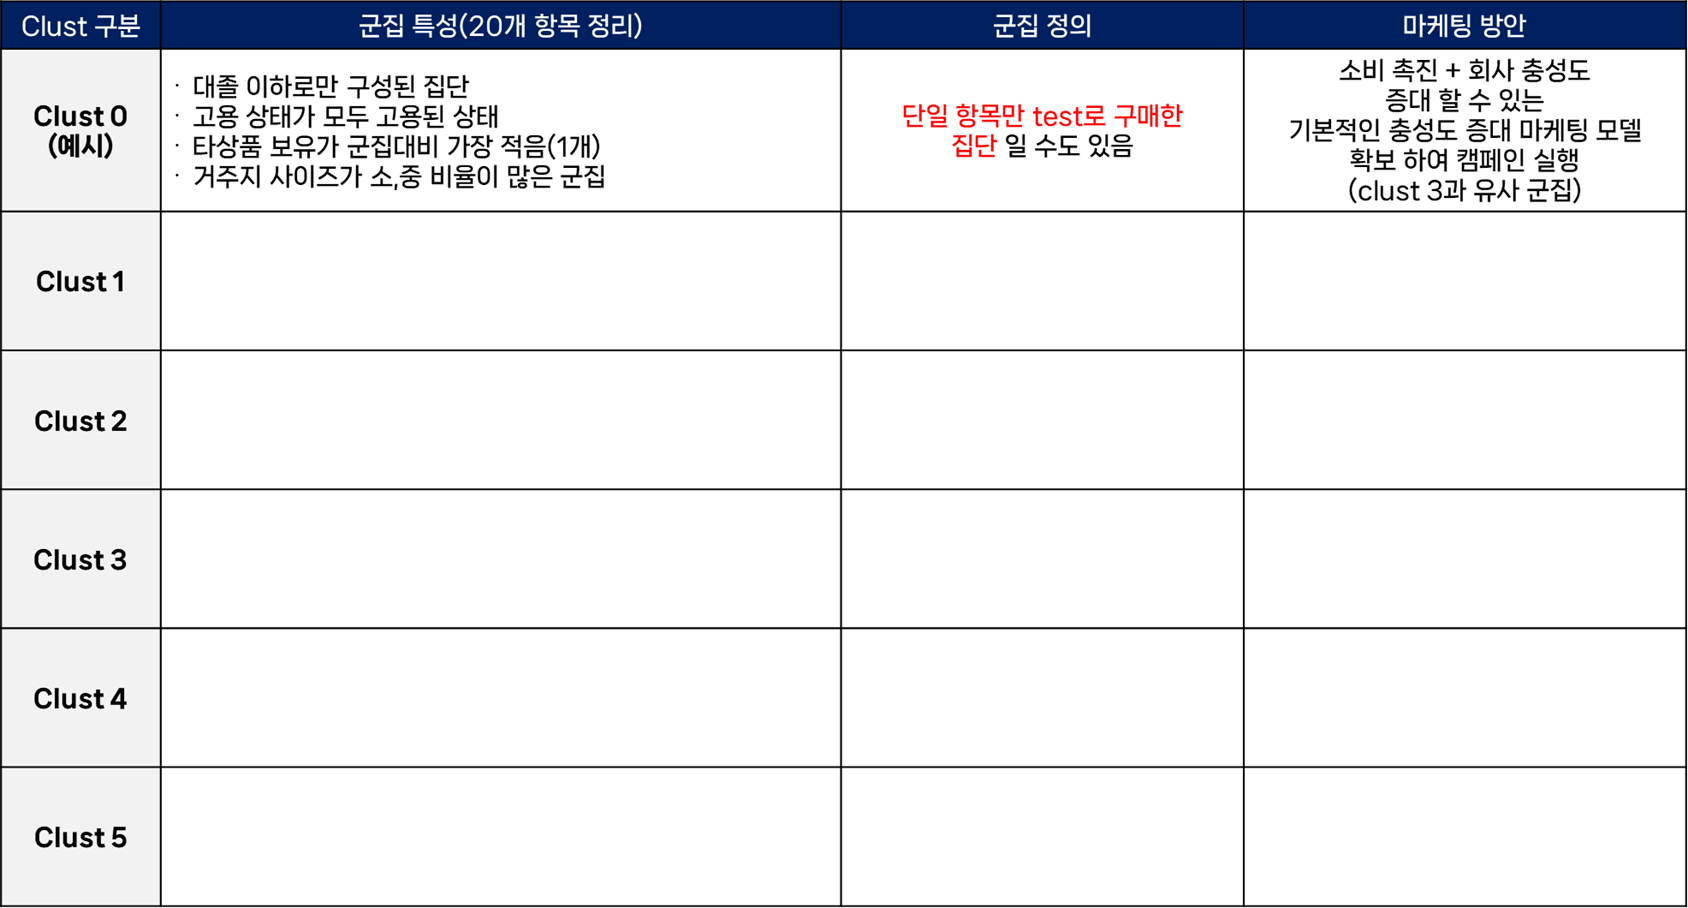

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

### <font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!